In [ ]:
import train

import torch
import torchvision
import os
import argparse
import matplotlib.pyplot as plt


from model import Generator
from utils import load_model
import utils
from google.colab import files

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%pip install -q pytorch_fid

## Training

In [ ]:
'''
For reasonable results, use:
epochs = 400
epochs_jensen_shannon = 200
mnist_size = 0 # This uses all the samples of the dataset
'''
epochs = 400
epochs_jensen_shannon = 400 # Normally, 200
mnist_size = 10000
DOWNLOAD = False

In [ ]:
os.makedirs('checkpoints', exist_ok=True)
def save_models(G, D, folder, name):
    torch.save(G.state_dict(), os.path.join(folder,f"G_{name}.pth"))
    torch.save(D.state_dict(), os.path.join(folder,f"D_{name}.pth"))

### KL Divergence

Used divergence: KL
GPU is available
Dataset loading...
Dataset Loaded.
Model Loading...
Model loaded.
Start Training :


  2%|▏         | 9/400 [00:29<16:38,  2.55s/it]

Start Generating


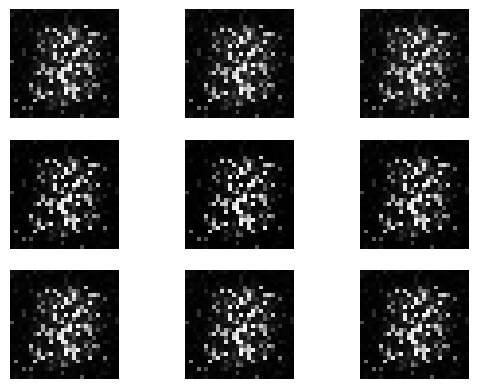

  5%|▍         | 19/400 [00:54<15:30,  2.44s/it]

Start Generating


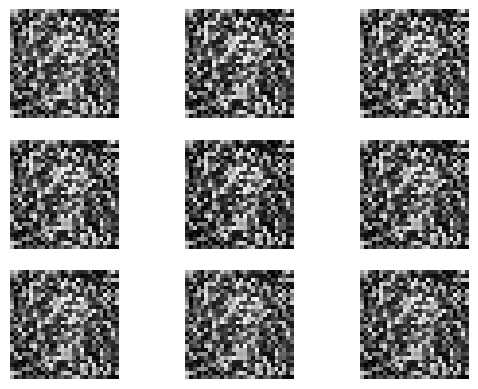

  7%|▋         | 29/400 [01:25<16:40,  2.70s/it]

Start Generating


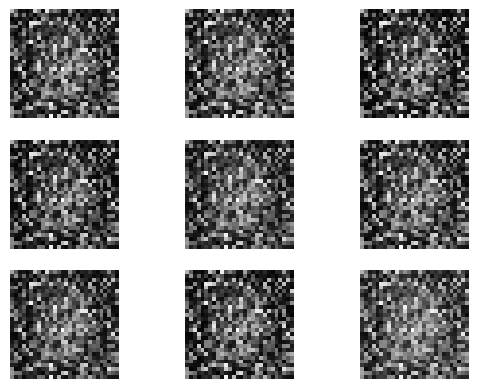

 10%|▉         | 39/400 [01:51<15:13,  2.53s/it]

Start Generating


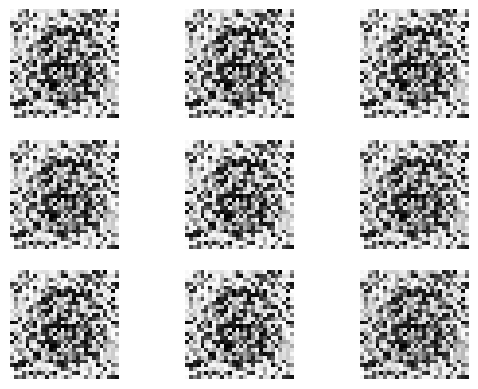

 12%|█▏        | 49/400 [02:16<13:56,  2.38s/it]

Start Generating


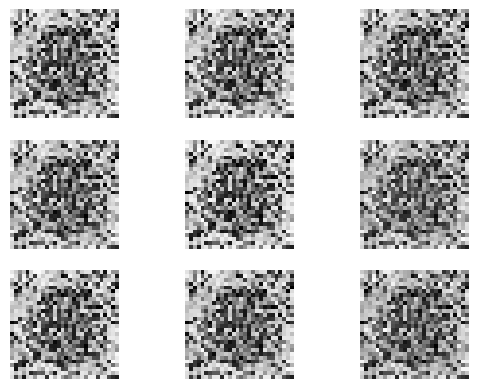

 15%|█▍        | 59/400 [02:39<12:10,  2.14s/it]

Start Generating


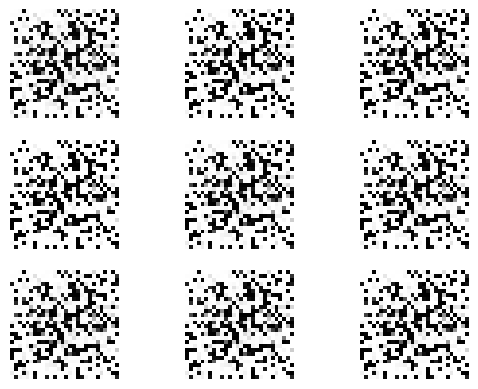

 17%|█▋        | 69/400 [03:03<12:14,  2.22s/it]

Start Generating


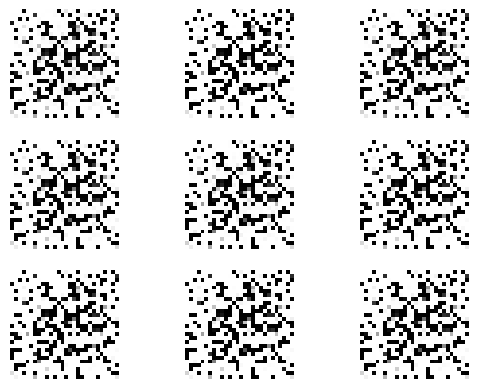

 20%|█▉        | 79/400 [03:26<12:42,  2.38s/it]

Start Generating


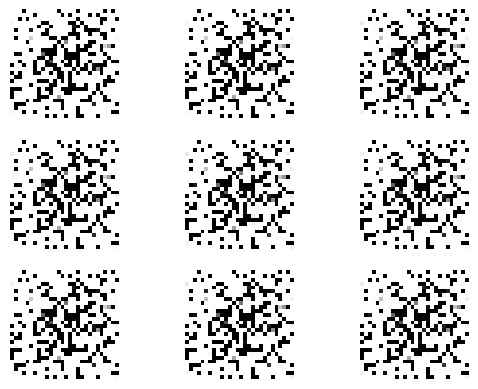

 22%|██▏       | 89/400 [03:50<11:36,  2.24s/it]

Start Generating


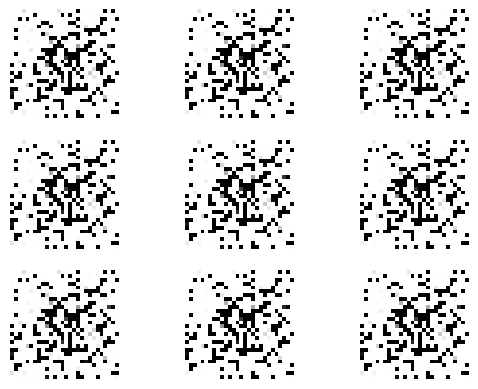

 25%|██▍       | 99/400 [04:13<11:01,  2.20s/it]

Start Generating


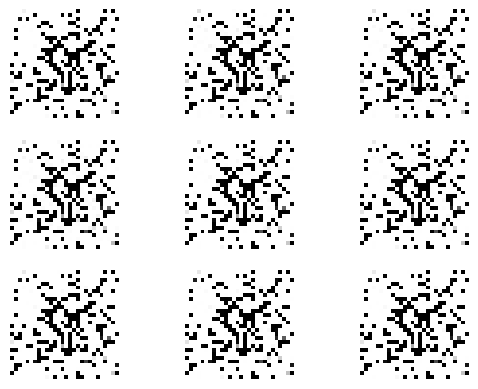

 27%|██▋       | 109/400 [04:37<11:17,  2.33s/it]

Start Generating


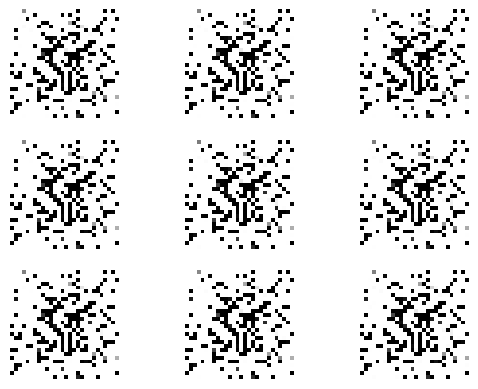

 30%|██▉       | 119/400 [05:03<12:41,  2.71s/it]

Start Generating


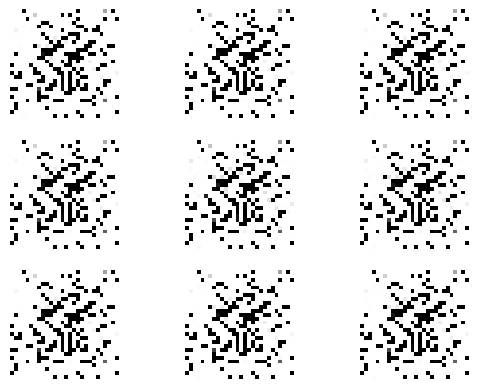

 32%|███▏      | 129/400 [05:32<11:53,  2.63s/it]

Start Generating


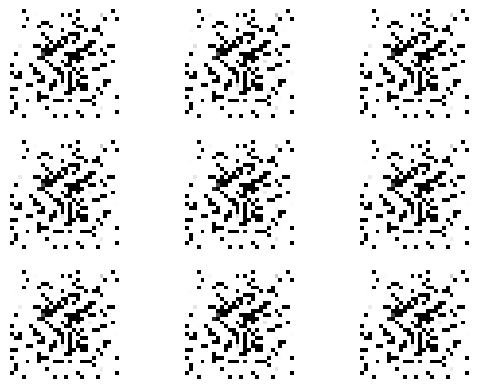

 35%|███▍      | 139/400 [05:55<09:38,  2.22s/it]

Start Generating


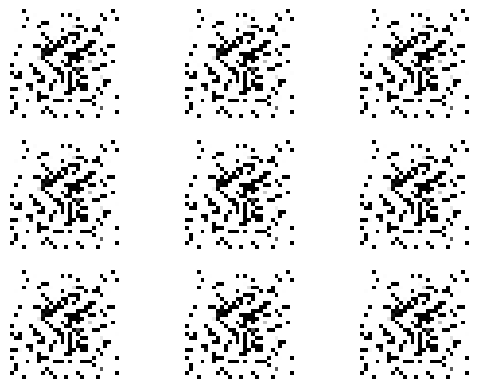

 37%|███▋      | 149/400 [06:19<09:21,  2.24s/it]

Start Generating


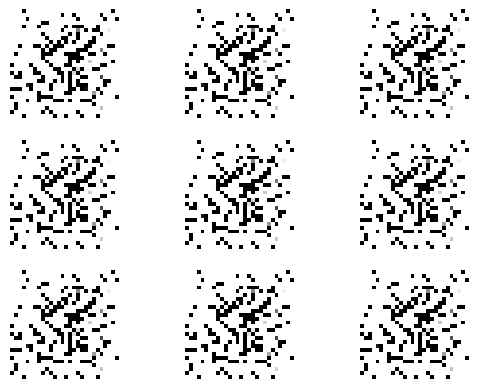

 40%|███▉      | 159/400 [06:43<09:40,  2.41s/it]

Start Generating


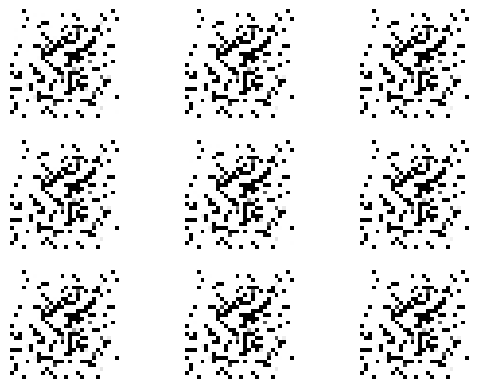

 42%|████▏     | 169/400 [07:07<08:59,  2.34s/it]

Start Generating


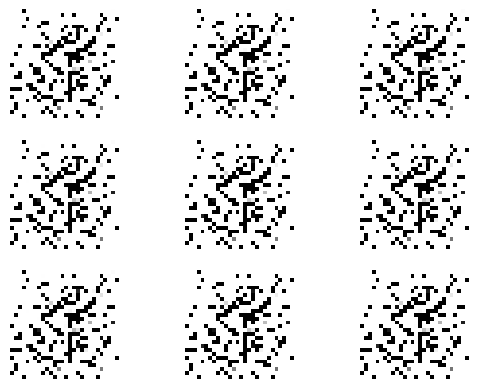

 45%|████▍     | 179/400 [07:31<08:12,  2.23s/it]

Start Generating


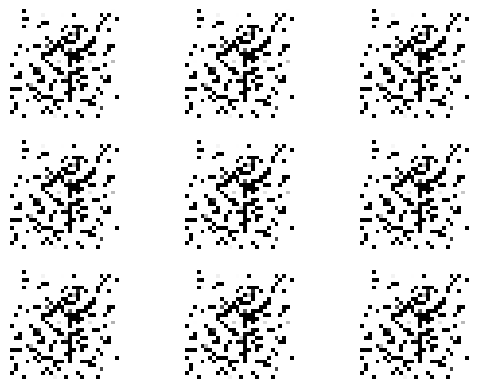

 47%|████▋     | 189/400 [07:56<08:17,  2.36s/it]

Start Generating


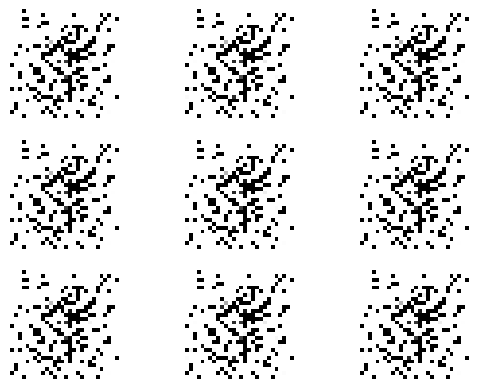

 50%|████▉     | 199/400 [08:20<08:14,  2.46s/it]

Start Generating


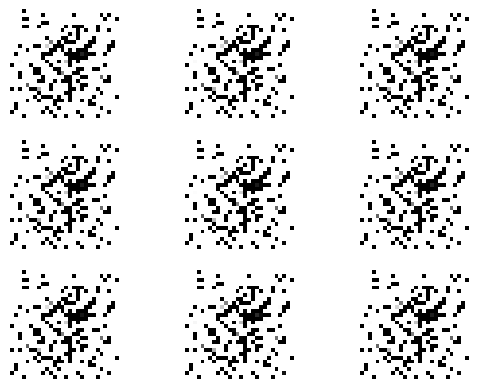

 52%|█████▏    | 209/400 [08:45<07:40,  2.41s/it]

Start Generating


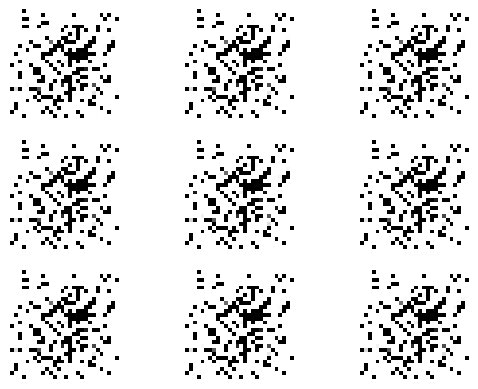

 55%|█████▍    | 219/400 [09:09<06:42,  2.23s/it]

Start Generating


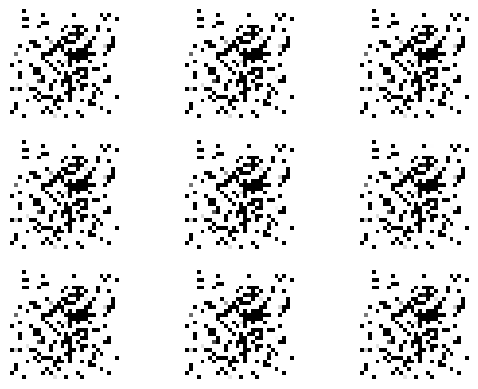

 57%|█████▋    | 229/400 [09:32<06:51,  2.41s/it]

Start Generating


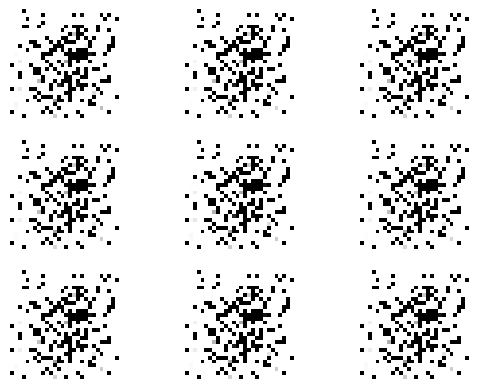

 60%|█████▉    | 239/400 [09:55<05:57,  2.22s/it]

Start Generating


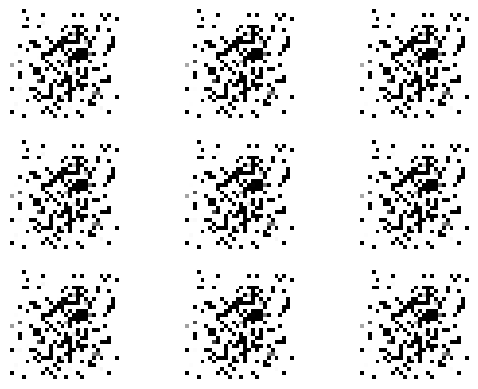

 62%|██████▏   | 249/400 [10:19<05:44,  2.28s/it]

Start Generating


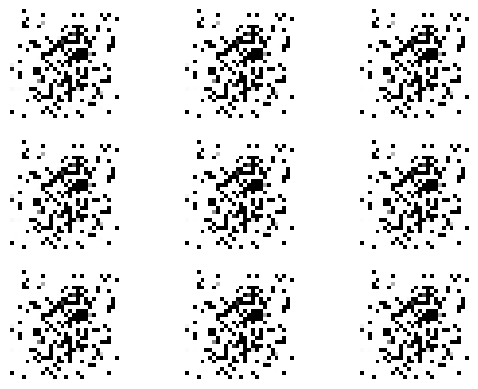

 65%|██████▍   | 259/400 [10:43<05:26,  2.31s/it]

Start Generating


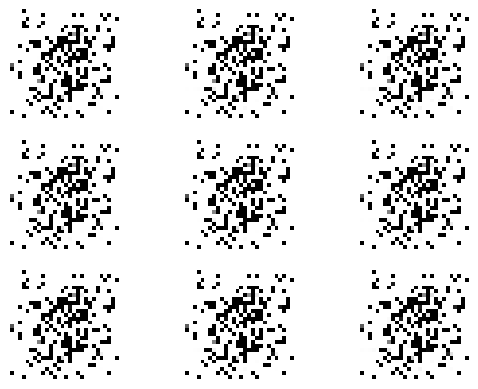

 67%|██████▋   | 269/400 [11:06<04:54,  2.25s/it]

Start Generating


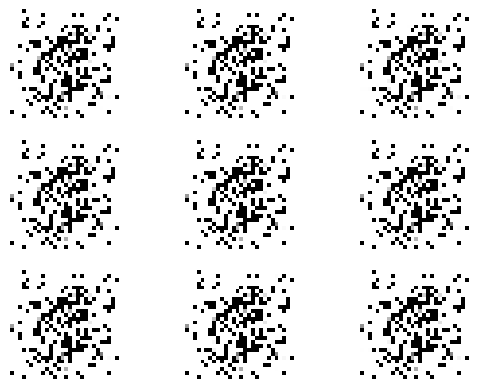

 70%|██████▉   | 279/400 [11:29<04:28,  2.22s/it]

Start Generating


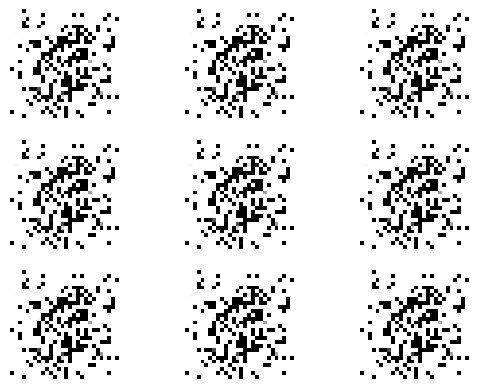

 72%|███████▏  | 289/400 [11:53<04:15,  2.30s/it]

Start Generating


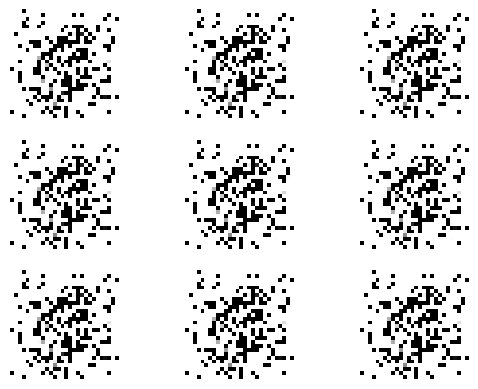

 75%|███████▍  | 299/400 [12:18<04:23,  2.61s/it]

Start Generating


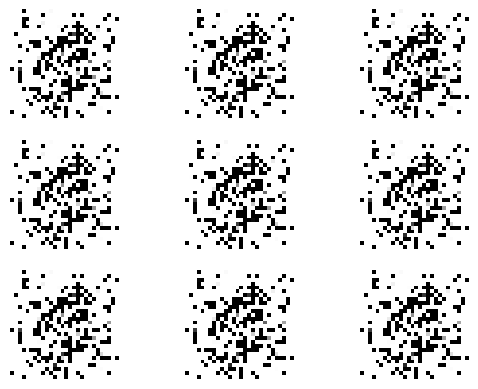

 77%|███████▋  | 309/400 [12:41<03:21,  2.21s/it]

Start Generating


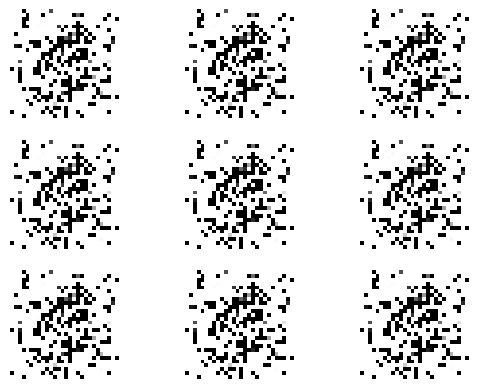

 80%|███████▉  | 319/400 [13:05<03:04,  2.28s/it]

Start Generating


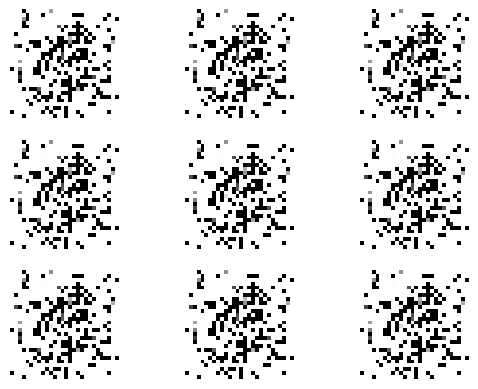

 82%|████████▏ | 329/400 [13:29<02:55,  2.47s/it]

Start Generating


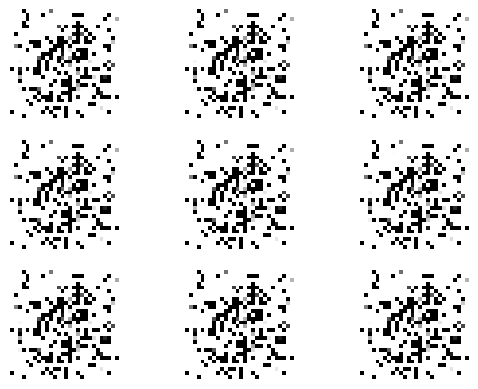

 85%|████████▍ | 339/400 [13:52<02:16,  2.23s/it]

Start Generating


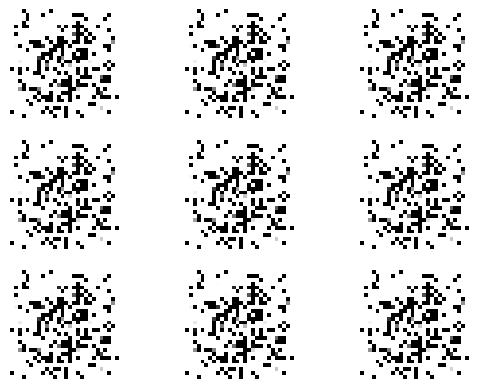

 87%|████████▋ | 349/400 [14:16<01:54,  2.24s/it]

Start Generating


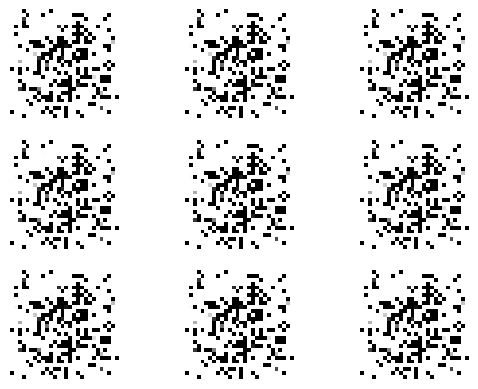

 90%|████████▉ | 359/400 [14:40<01:40,  2.46s/it]

Start Generating


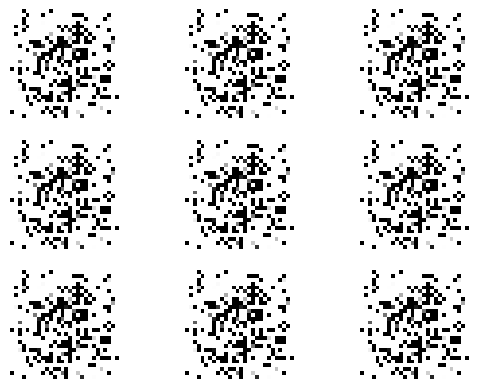

 92%|█████████▏| 369/400 [15:03<01:07,  2.19s/it]

Start Generating


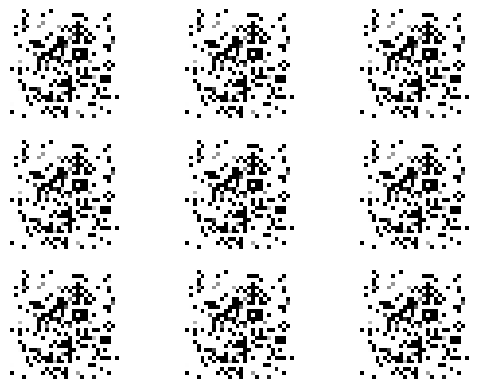

 95%|█████████▍| 379/400 [15:27<00:48,  2.29s/it]

Start Generating


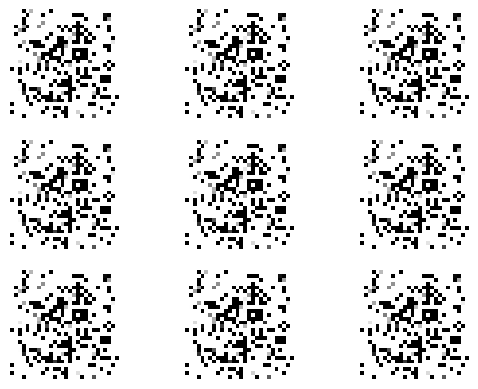

 97%|█████████▋| 389/400 [15:51<00:26,  2.40s/it]

Start Generating


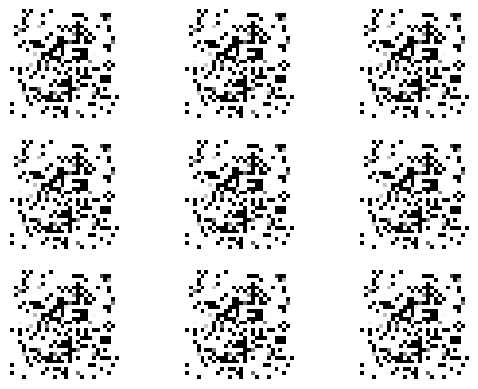

100%|█████████▉| 399/400 [16:13<00:02,  2.17s/it]

Start Generating


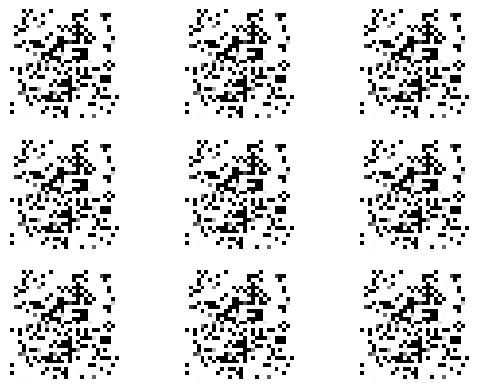

100%|██████████| 400/400 [16:17<00:00,  2.44s/it]


Training done


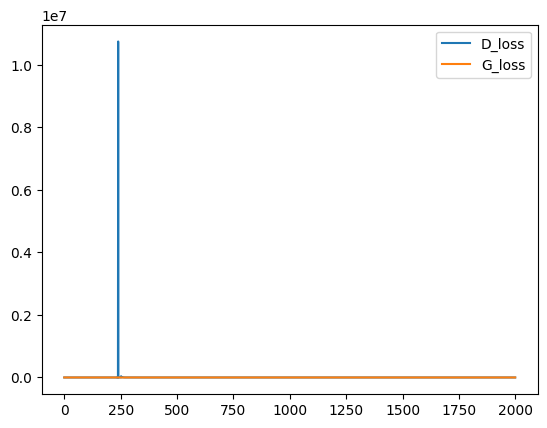

In [ ]:
G_KL, D_KL, G_loss_history_KL, D_loss_history_KL = train.main(epochs = epochs, lr = 0.0002, batch_size = 2048, mnist_size = mnist_size, f_divergence = 2)
plt.plot(D_loss_history_KL, label = "D_loss")
plt.plot(G_loss_history_KL, label = "G_loss")
plt.legend()
plt.show()

In [ ]:
save_models(G_KL, D_KL, "checkpoints", "KL")
if (DOWNLOAD):
  files.download('./checkpoints/G_KL.pth')
  files.download('./checkpoints/D_KL.pth')

### Reverse KL Divergence

Used divergence: Reverse KL
GPU is available
Dataset loading...
Dataset Loaded.
Model Loading...
Model loaded.
Start Training :


  2%|▏         | 9/400 [00:36<19:59,  3.07s/it]

Start Generating


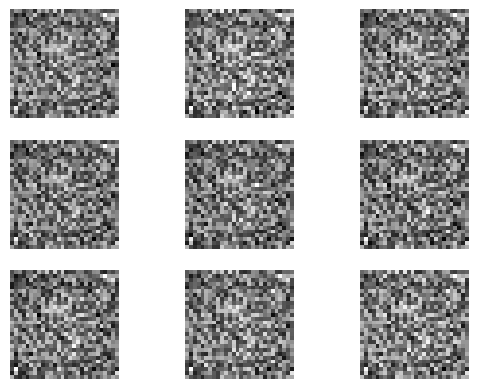

  5%|▍         | 19/400 [01:00<15:24,  2.43s/it]

Start Generating


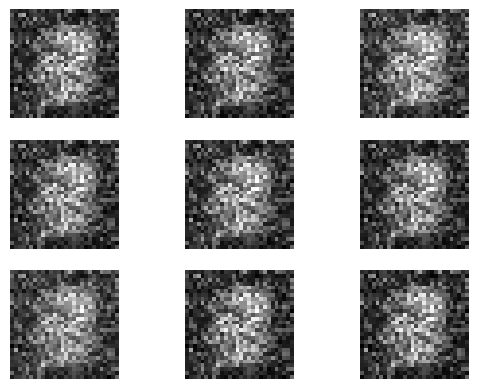

  7%|▋         | 29/400 [01:23<13:20,  2.16s/it]

Start Generating


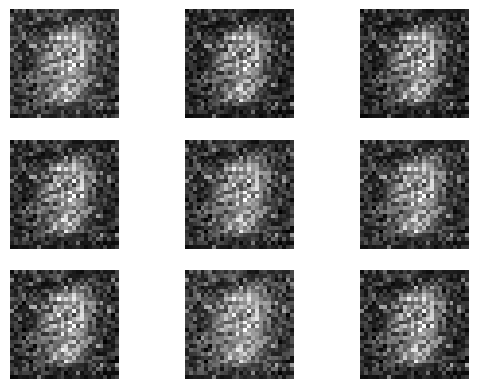

 10%|▉         | 39/400 [01:49<15:09,  2.52s/it]

Start Generating


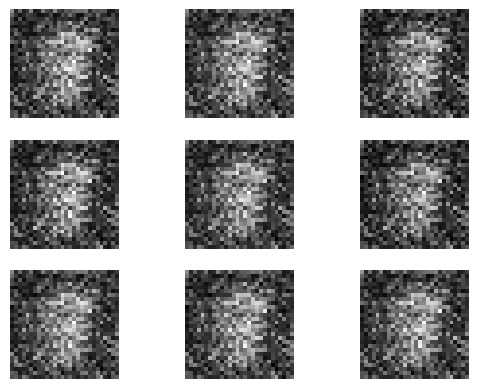

 12%|█▏        | 49/400 [02:14<15:45,  2.69s/it]

Start Generating


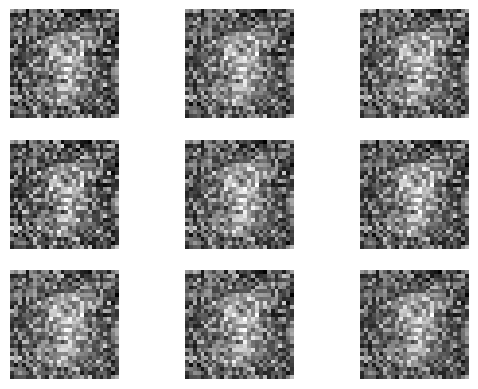

 15%|█▍        | 59/400 [02:36<12:28,  2.20s/it]

Start Generating


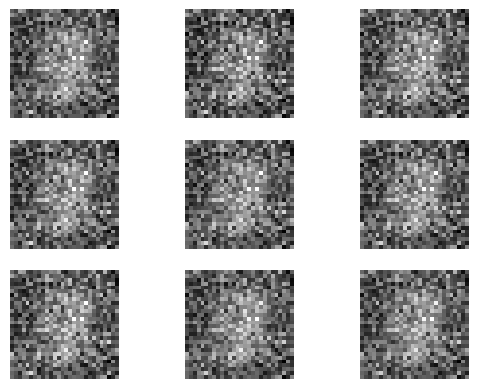

 17%|█▋        | 69/400 [03:00<12:27,  2.26s/it]

Start Generating


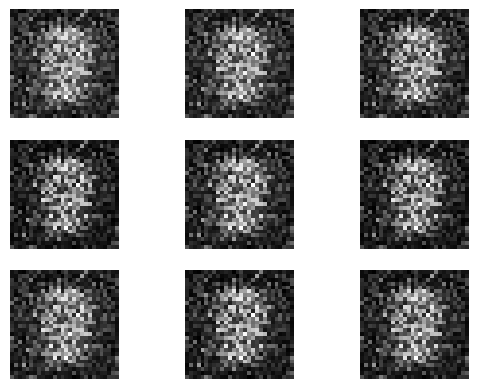

 20%|█▉        | 79/400 [03:24<12:44,  2.38s/it]

Start Generating


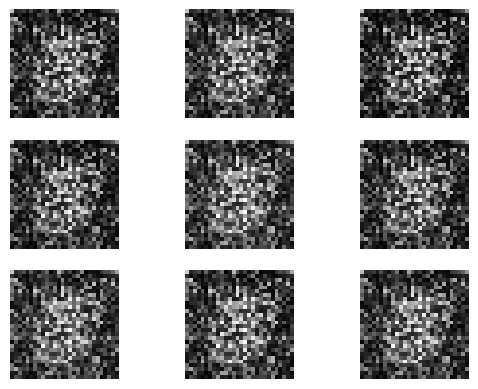

 22%|██▏       | 89/400 [03:46<11:05,  2.14s/it]

Start Generating


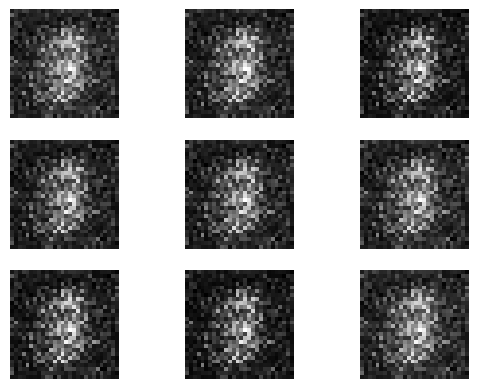

 25%|██▍       | 99/400 [04:10<11:11,  2.23s/it]

Start Generating


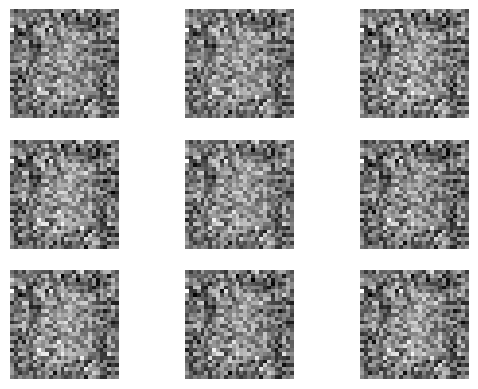

 27%|██▋       | 109/400 [04:34<11:39,  2.40s/it]

Start Generating


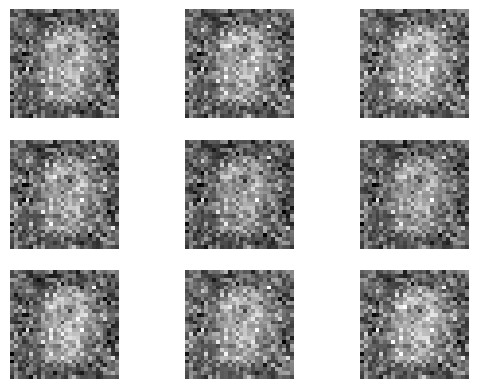

 30%|██▉       | 119/400 [04:58<10:42,  2.29s/it]

Start Generating


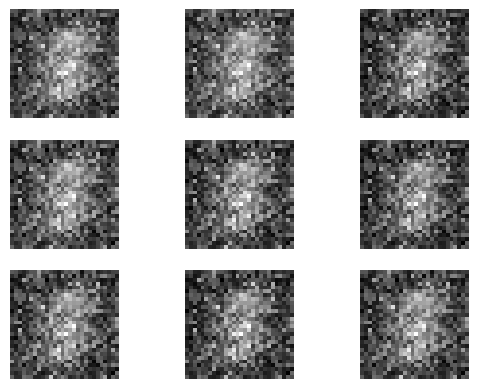

 32%|███▏      | 129/400 [05:21<09:52,  2.19s/it]

Start Generating


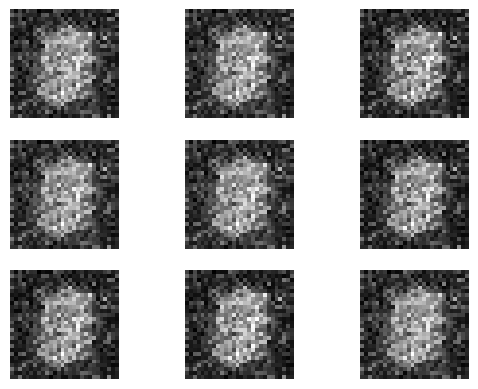

 35%|███▍      | 139/400 [05:45<10:04,  2.32s/it]

Start Generating


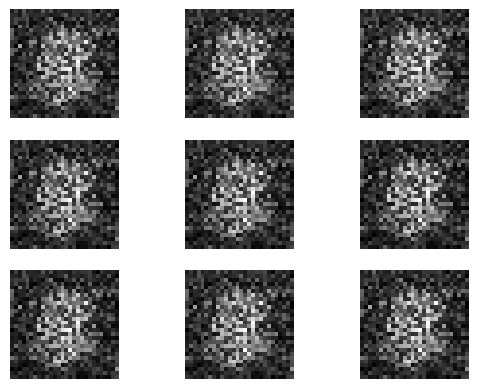

 37%|███▋      | 149/400 [06:08<09:27,  2.26s/it]

Start Generating


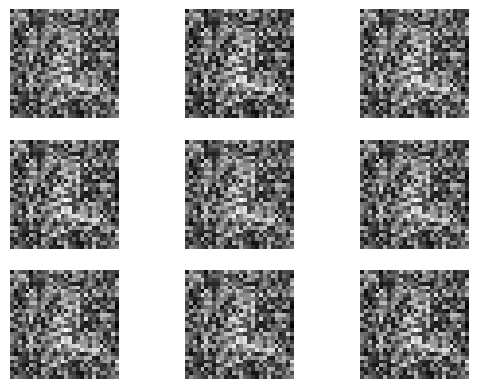

 40%|███▉      | 159/400 [06:31<08:47,  2.19s/it]

Start Generating


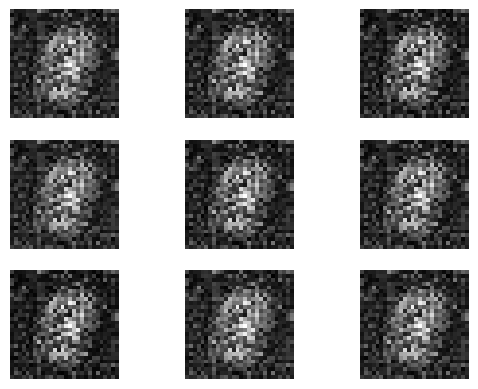

 42%|████▏     | 169/400 [06:55<08:56,  2.32s/it]

Start Generating


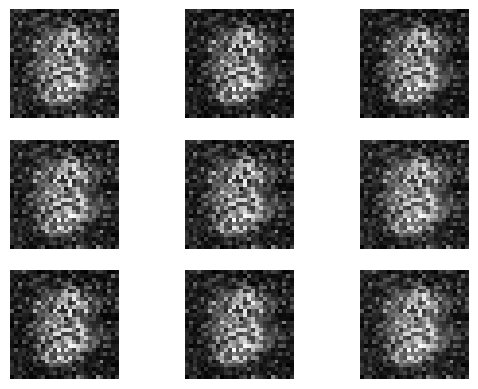

 45%|████▍     | 179/400 [07:18<08:20,  2.27s/it]

Start Generating


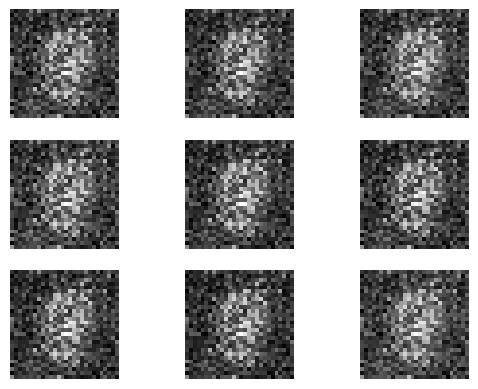

 47%|████▋     | 189/400 [07:41<07:36,  2.16s/it]

Start Generating


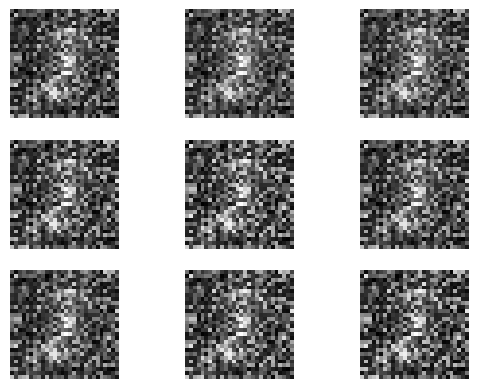

 50%|████▉     | 199/400 [08:05<07:52,  2.35s/it]

Start Generating


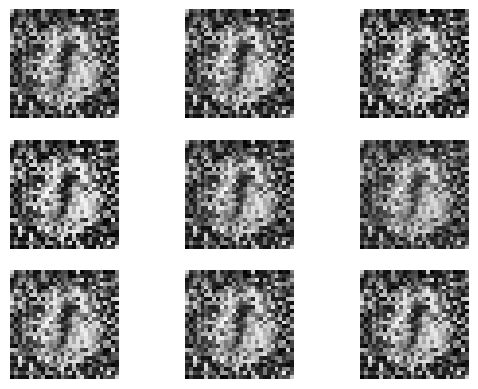

 52%|█████▏    | 209/400 [08:28<07:15,  2.28s/it]

Start Generating


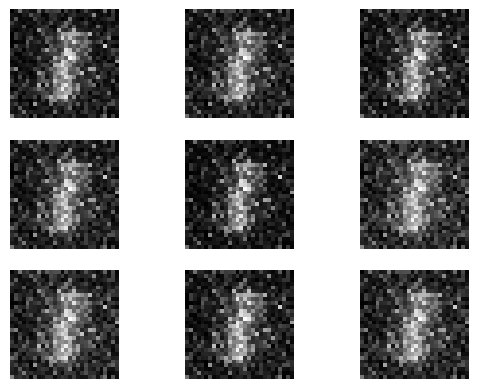

 55%|█████▍    | 219/400 [08:51<06:41,  2.22s/it]

Start Generating


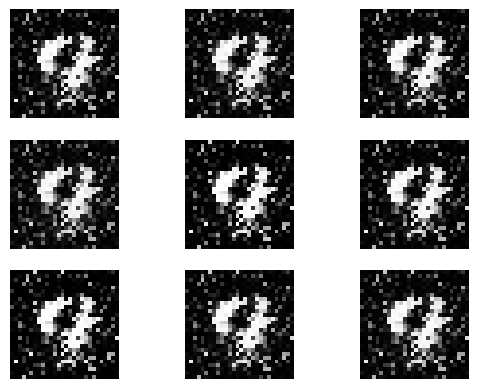

 57%|█████▋    | 229/400 [09:16<06:45,  2.37s/it]

Start Generating


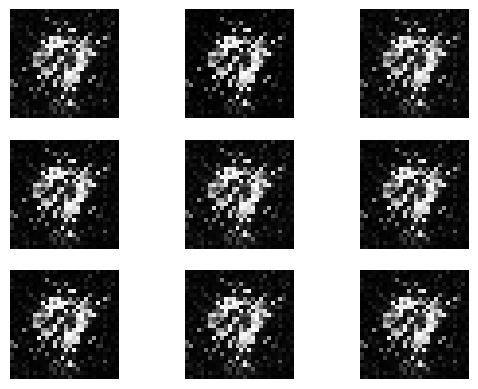

 60%|█████▉    | 239/400 [09:40<06:24,  2.39s/it]

Start Generating


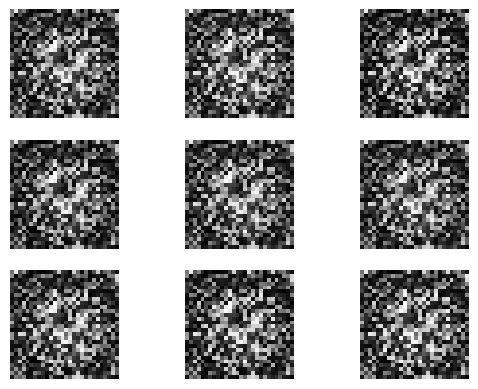

 62%|██████▏   | 249/400 [10:03<05:32,  2.20s/it]

Start Generating


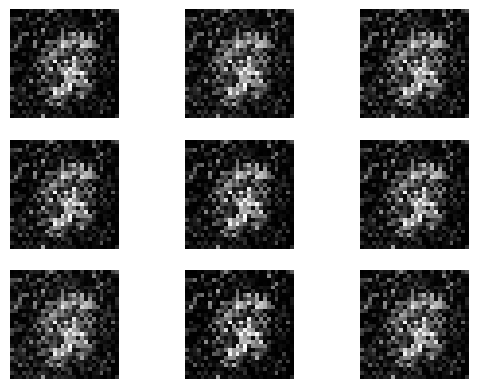

 65%|██████▍   | 259/400 [10:27<05:26,  2.32s/it]

Start Generating


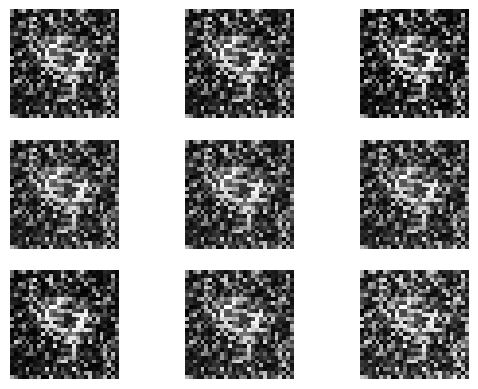

 67%|██████▋   | 269/400 [10:51<05:10,  2.37s/it]

Start Generating


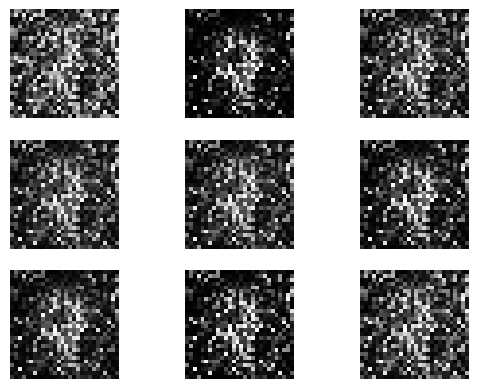

 70%|██████▉   | 279/400 [11:15<04:40,  2.32s/it]

Start Generating


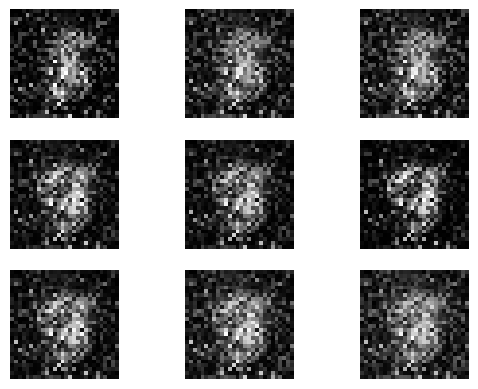

 72%|███████▏  | 289/400 [11:39<04:19,  2.33s/it]

Start Generating


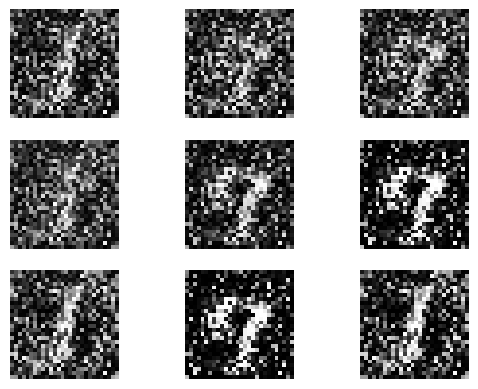

 75%|███████▍  | 299/400 [12:02<03:57,  2.36s/it]

Start Generating


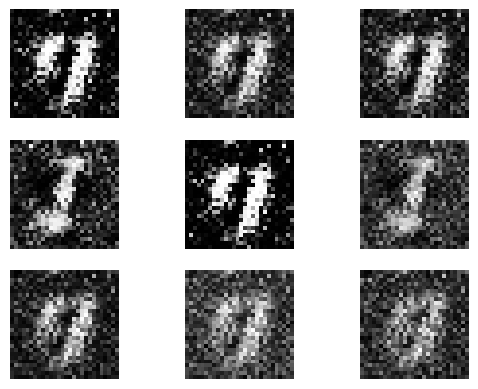

 77%|███████▋  | 309/400 [12:26<03:19,  2.20s/it]

Start Generating


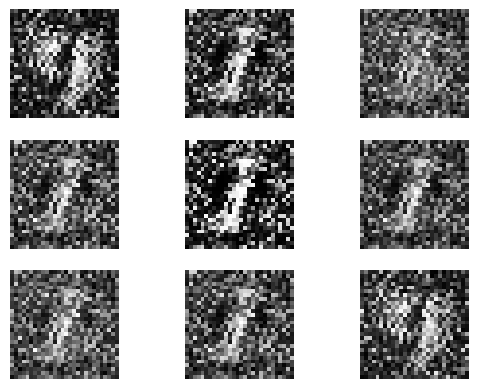

 80%|███████▉  | 319/400 [12:49<03:08,  2.33s/it]

Start Generating


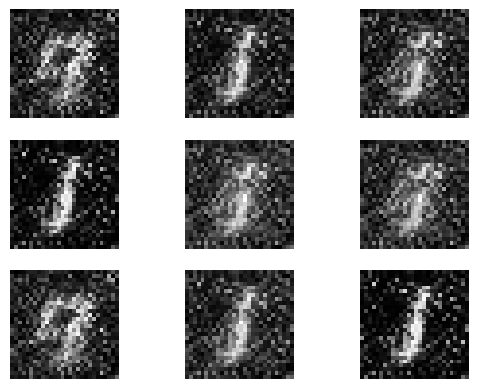

 82%|████████▏ | 329/400 [13:12<02:42,  2.30s/it]

Start Generating


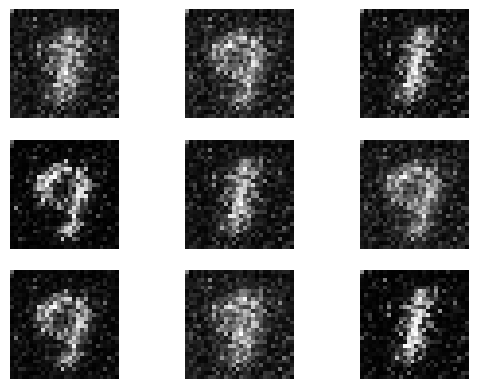

 85%|████████▍ | 339/400 [13:37<02:14,  2.20s/it]

Start Generating


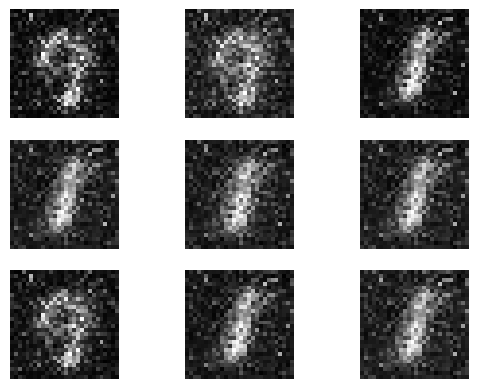

 87%|████████▋ | 349/400 [14:01<01:55,  2.27s/it]

Start Generating


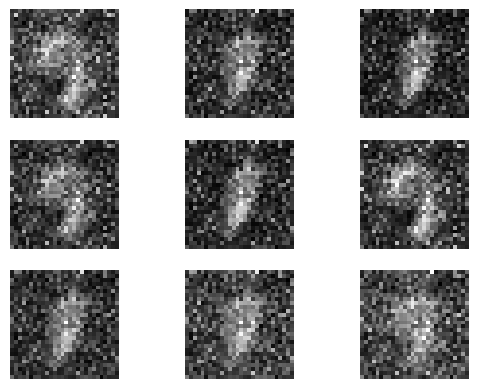

 90%|████████▉ | 359/400 [14:25<01:37,  2.39s/it]

Start Generating


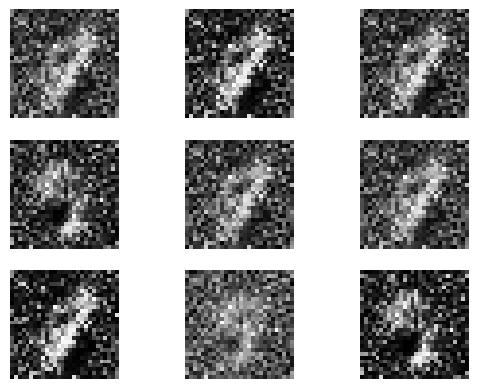

 92%|█████████▏| 369/400 [14:48<01:08,  2.20s/it]

Start Generating


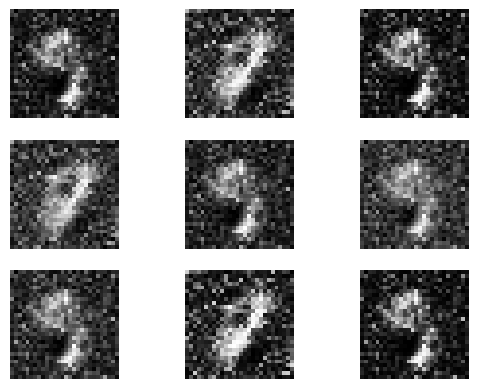

 95%|█████████▍| 379/400 [15:11<00:46,  2.24s/it]

Start Generating


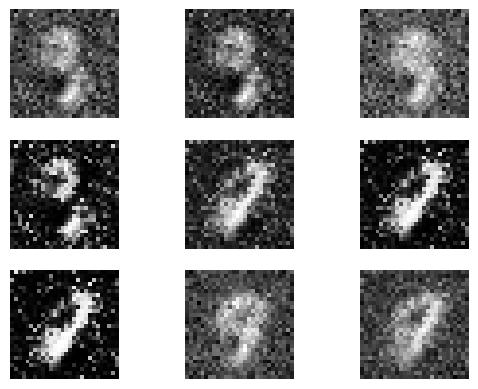

 97%|█████████▋| 389/400 [15:35<00:26,  2.45s/it]

Start Generating


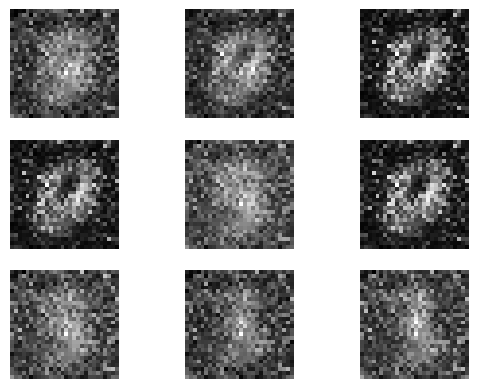

100%|█████████▉| 399/400 [15:58<00:02,  2.16s/it]

Start Generating


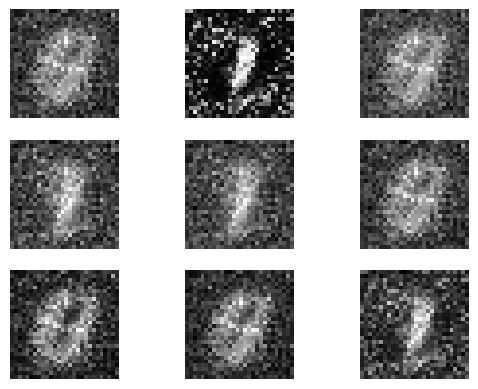

100%|██████████| 400/400 [16:01<00:00,  2.40s/it]


Training done


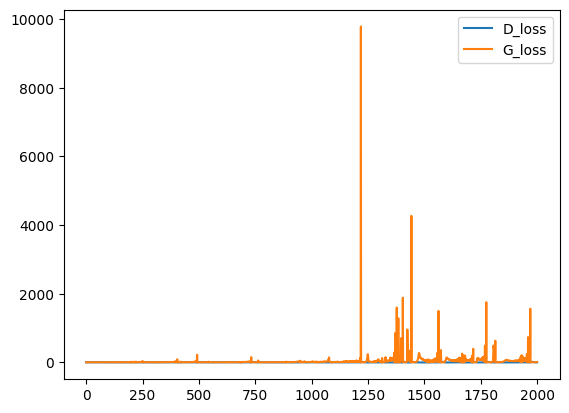

In [ ]:
G_reverse_KL, D_reverse_KL, G_loss_history_reverse_KL, D_loss_history_reverse_KL = train.main(epochs = epochs, lr = 0.0002, batch_size = 2048, mnist_size = mnist_size, f_divergence = 3)
plt.plot(D_loss_history_reverse_KL, label = "D_loss")
plt.plot(G_loss_history_reverse_KL, label = "G_loss")
plt.legend()
plt.show()
save_models(G_reverse_KL, D_reverse_KL, "checkpoints", "reverse_KL")
if (DOWNLOAD):
  files.download('./checkpoints/G_reverse_KL.pth')
  files.download('./checkpoints/D_reverse_KL.pth')

### Pearson Divergence

Used divergence: Pearson X^2
GPU is available
Dataset loading...
Dataset Loaded.
Model Loading...
Model loaded.
Start Training :


  2%|▏         | 9/400 [00:20<14:27,  2.22s/it]

Start Generating


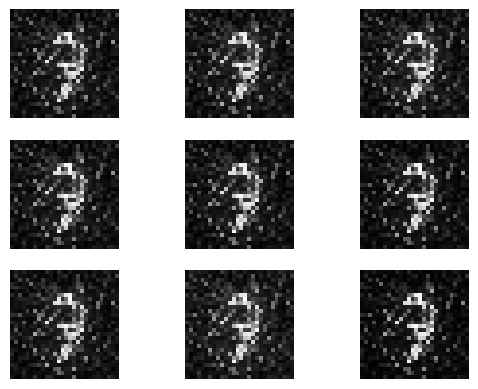

  5%|▍         | 19/400 [00:43<15:15,  2.40s/it]

Start Generating


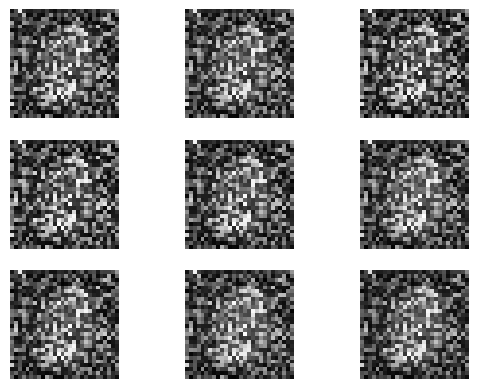

  7%|▋         | 29/400 [01:06<13:14,  2.14s/it]

Start Generating


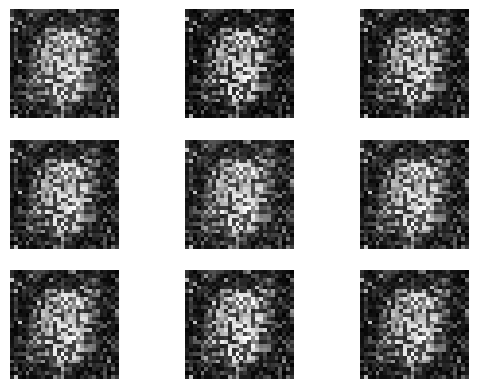

 10%|▉         | 39/400 [01:29<13:35,  2.26s/it]

Start Generating


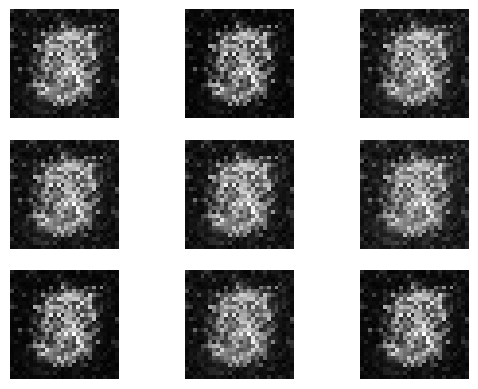

 12%|█▏        | 49/400 [01:54<14:15,  2.44s/it]

Start Generating


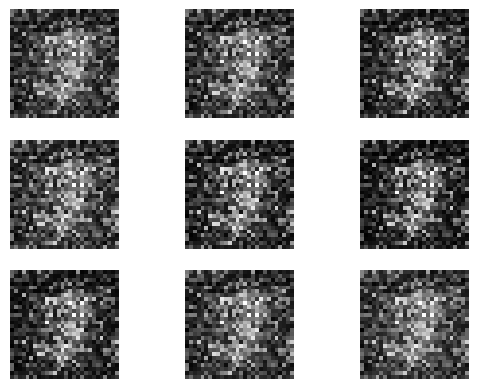

 15%|█▍        | 59/400 [02:17<12:13,  2.15s/it]

Start Generating


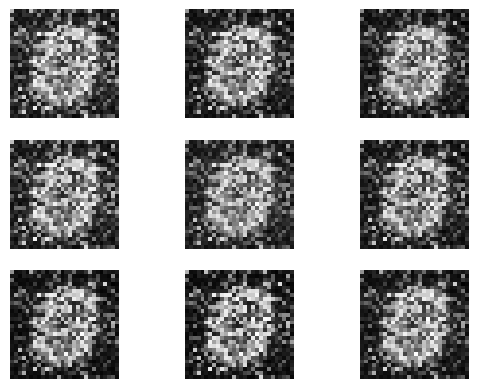

 17%|█▋        | 69/400 [02:40<12:34,  2.28s/it]

Start Generating


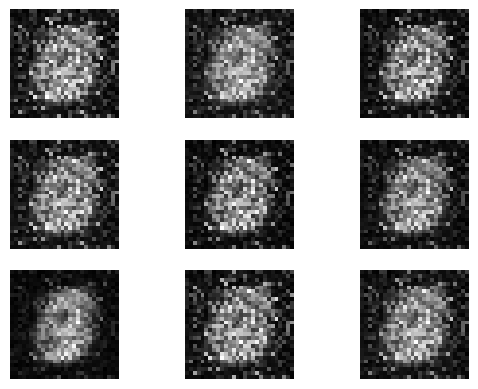

 20%|█▉        | 79/400 [03:04<12:24,  2.32s/it]

Start Generating


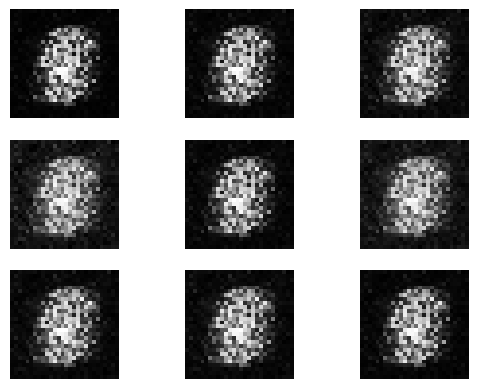

 22%|██▏       | 89/400 [03:26<11:21,  2.19s/it]

Start Generating


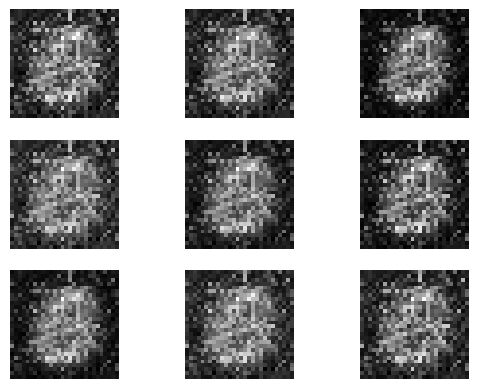

 25%|██▍       | 99/400 [03:50<11:35,  2.31s/it]

Start Generating


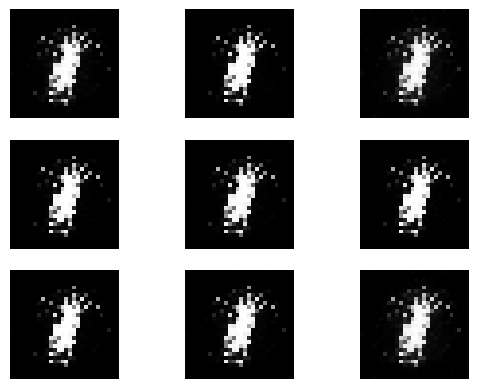

 27%|██▋       | 109/400 [04:15<12:32,  2.58s/it]

Start Generating


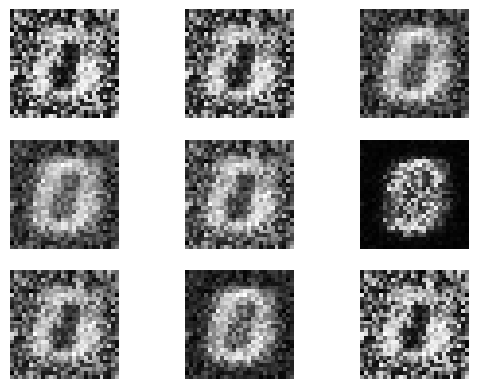

 30%|██▉       | 119/400 [04:39<10:27,  2.23s/it]

Start Generating


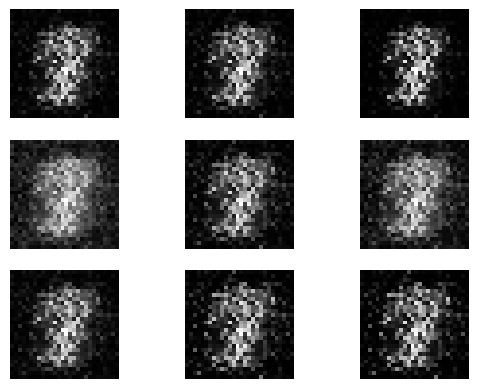

 32%|███▏      | 129/400 [05:03<10:27,  2.32s/it]

Start Generating


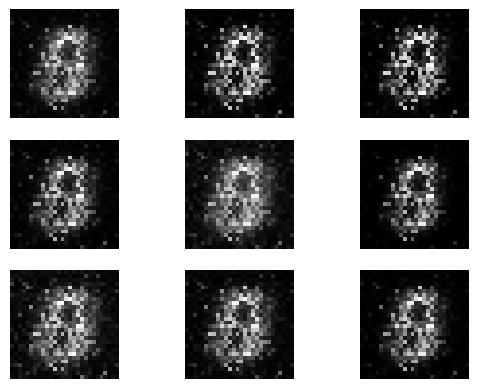

 35%|███▍      | 139/400 [05:28<10:45,  2.47s/it]

Start Generating


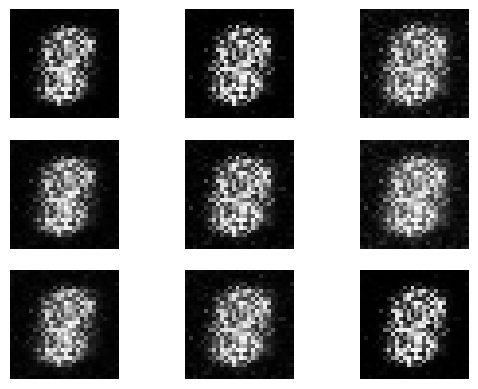

 37%|███▋      | 149/400 [05:51<09:30,  2.27s/it]

Start Generating


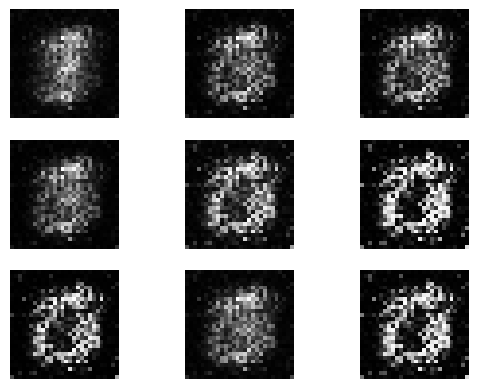

 40%|███▉      | 159/400 [06:16<08:51,  2.21s/it]

Start Generating


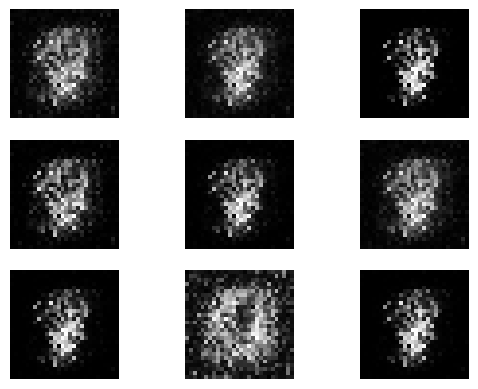

 42%|████▏     | 169/400 [06:40<09:05,  2.36s/it]

Start Generating


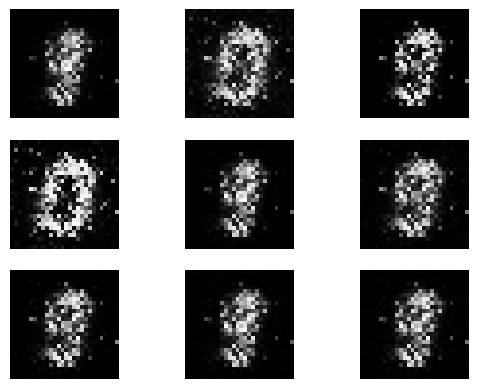

 45%|████▍     | 179/400 [07:05<09:13,  2.50s/it]

Start Generating


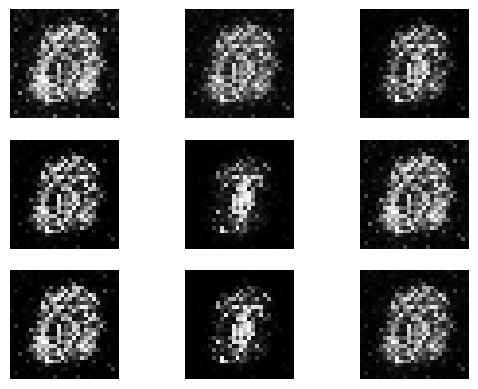

 47%|████▋     | 189/400 [07:28<07:41,  2.18s/it]

Start Generating


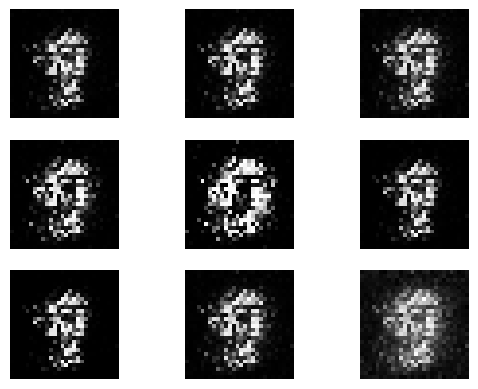

 50%|████▉     | 199/400 [07:52<07:33,  2.26s/it]

Start Generating


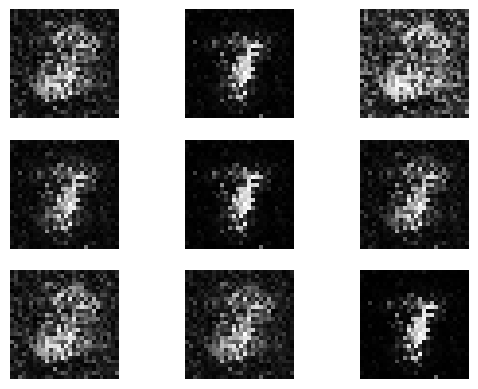

 52%|█████▏    | 209/400 [08:16<07:48,  2.45s/it]

Start Generating


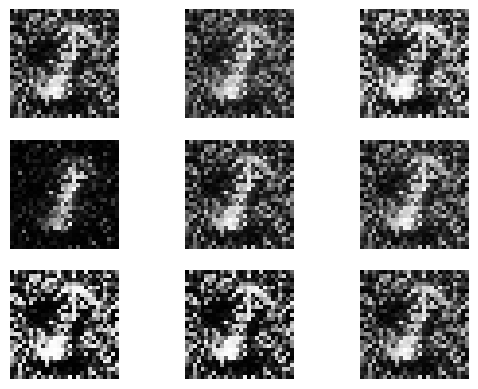

 55%|█████▍    | 219/400 [08:39<06:36,  2.19s/it]

Start Generating


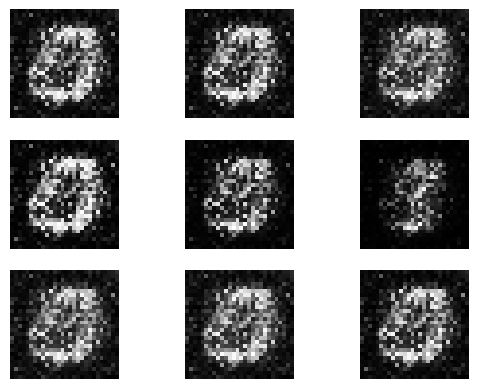

 57%|█████▋    | 229/400 [09:03<06:27,  2.27s/it]

Start Generating


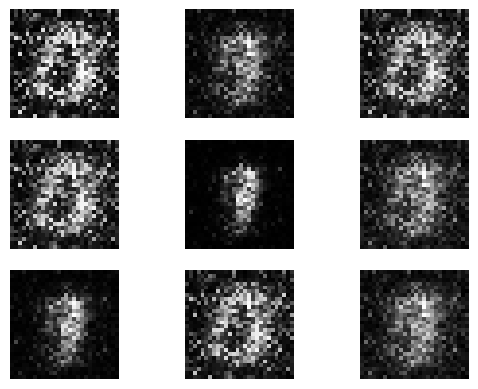

 60%|█████▉    | 239/400 [09:27<06:28,  2.41s/it]

Start Generating


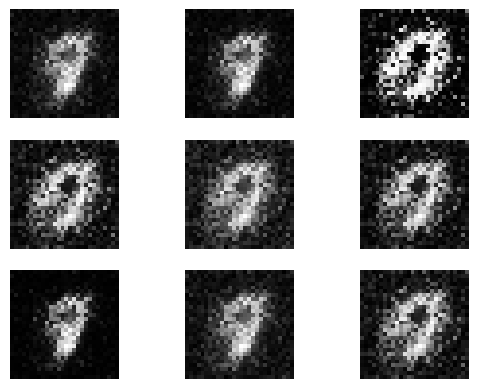

 62%|██████▏   | 249/400 [09:50<05:39,  2.25s/it]

Start Generating


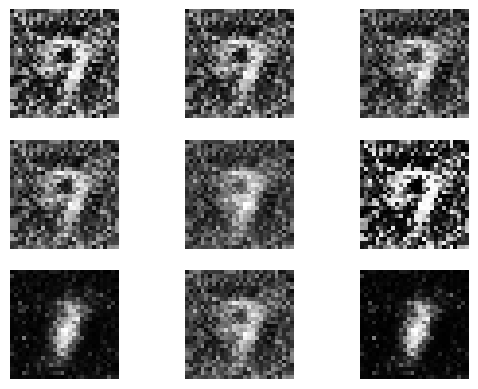

 65%|██████▍   | 259/400 [10:14<05:15,  2.24s/it]

Start Generating


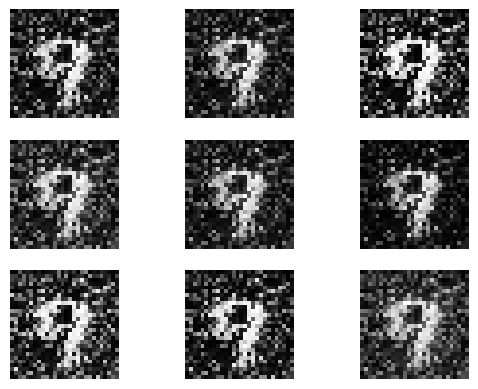

 67%|██████▋   | 269/400 [10:39<05:12,  2.39s/it]

Start Generating


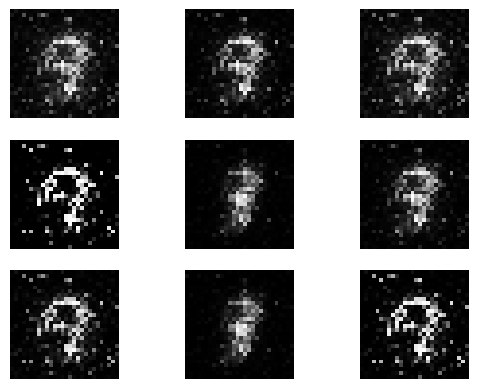

 70%|██████▉   | 279/400 [11:03<04:40,  2.31s/it]

Start Generating


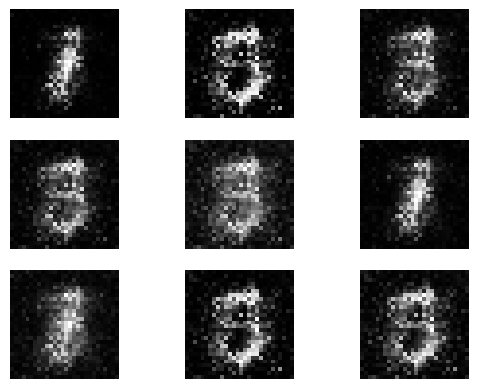

 72%|███████▏  | 289/400 [11:27<04:10,  2.26s/it]

Start Generating


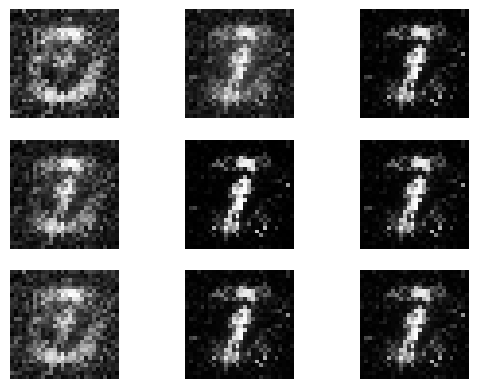

 75%|███████▍  | 299/400 [11:51<03:58,  2.36s/it]

Start Generating


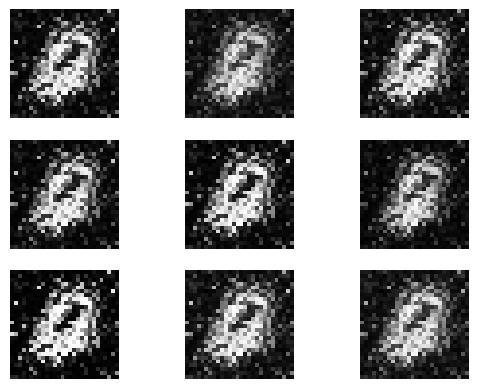

 77%|███████▋  | 309/400 [12:14<03:36,  2.37s/it]

Start Generating


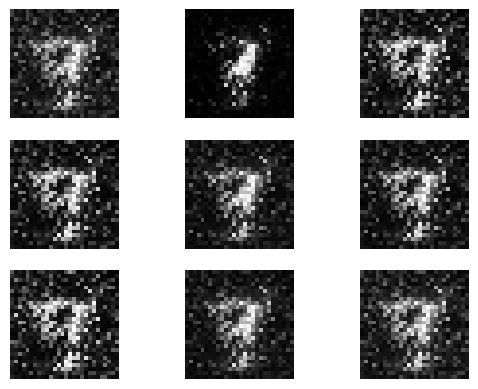

 80%|███████▉  | 319/400 [12:38<03:02,  2.25s/it]

Start Generating


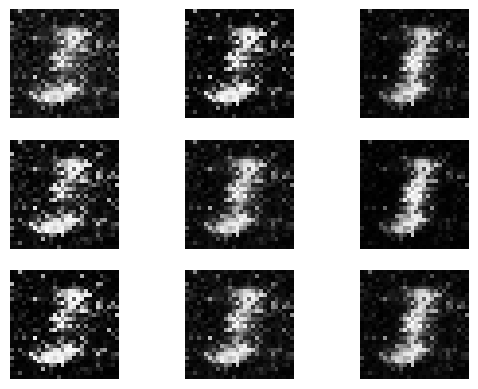

 82%|████████▏ | 329/400 [13:02<02:43,  2.30s/it]

Start Generating


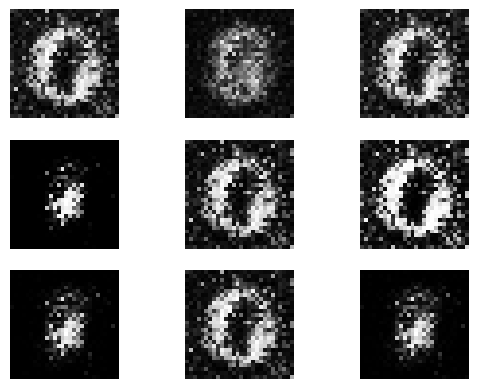

 85%|████████▍ | 339/400 [13:25<02:26,  2.40s/it]

Start Generating


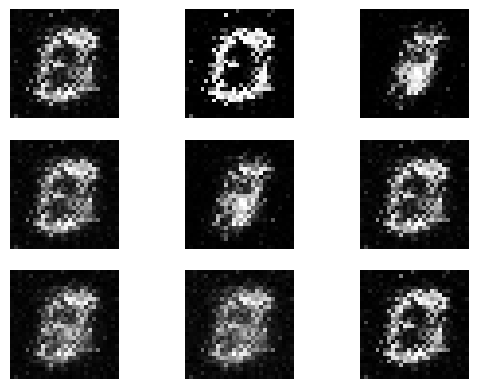

 87%|████████▋ | 349/400 [13:50<01:59,  2.34s/it]

Start Generating


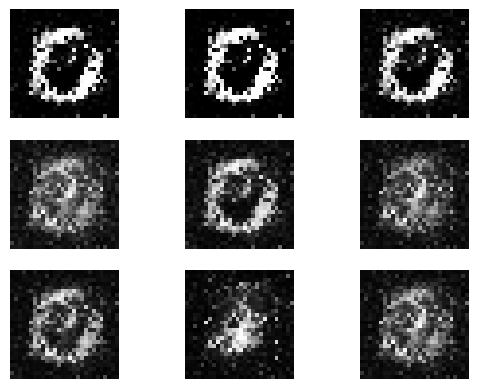

 90%|████████▉ | 359/400 [14:14<01:37,  2.37s/it]

Start Generating


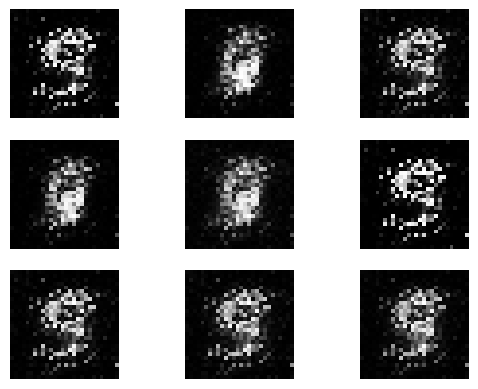

 92%|█████████▏| 369/400 [14:38<01:13,  2.37s/it]

Start Generating


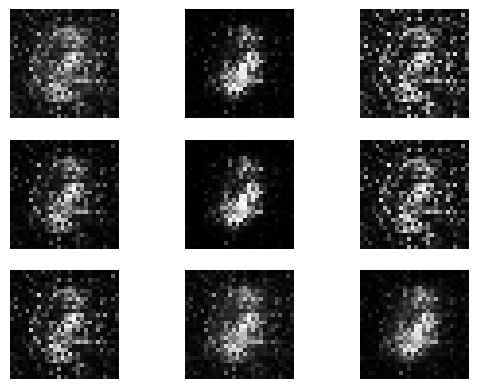

 95%|█████████▍| 379/400 [15:03<00:47,  2.27s/it]

Start Generating


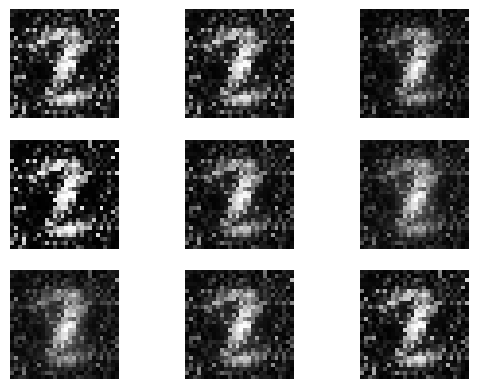

 97%|█████████▋| 389/400 [15:27<00:24,  2.25s/it]

Start Generating


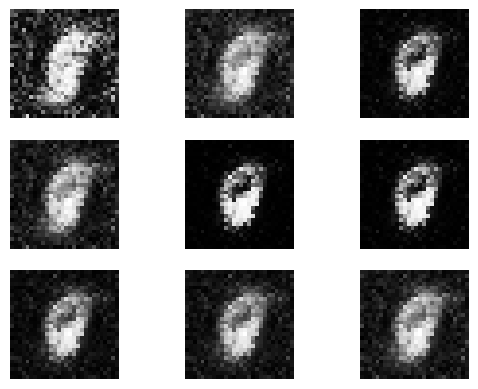

100%|█████████▉| 399/400 [15:51<00:02,  2.45s/it]

Start Generating


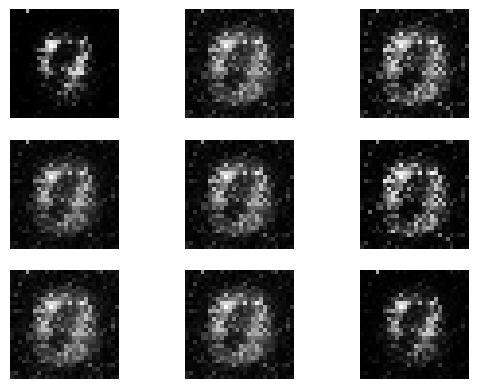

100%|██████████| 400/400 [15:54<00:00,  2.39s/it]


Training done


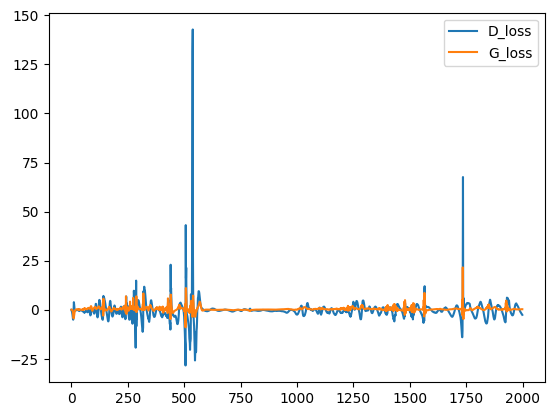

In [ ]:
G_pearson, D_pearson, G_loss_history_pearson, D_loss_history_pearson = train.main(epochs = epochs, lr = 0.0002, batch_size = 2048, mnist_size = mnist_size, f_divergence = 4)
plt.plot(D_loss_history_pearson, label = "D_loss")
plt.plot(G_loss_history_pearson, label = "G_loss")
plt.legend()
plt.show()

In [ ]:
save_models(G_pearson, D_pearson, "checkpoints", "pearson")
if (DOWNLOAD):
  files.download('./checkpoints/G_pearson.pth')
  files.download('./checkpoints/D_pearson.pth')

### Squared Hellinger Divergence

Used divergence: Squared Hellinger
GPU is available
Dataset loading...
Dataset Loaded.
Model Loading...
Model loaded.
Start Training :


  2%|▏         | 9/400 [00:20<14:35,  2.24s/it]

Start Generating


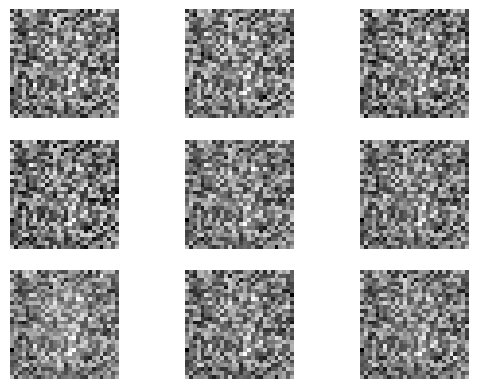

  5%|▍         | 19/400 [00:44<14:31,  2.29s/it]

Start Generating


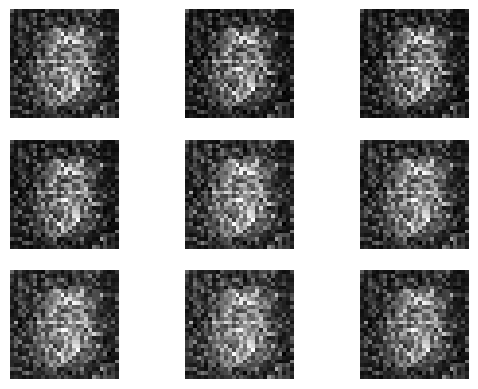

  7%|▋         | 29/400 [01:08<14:39,  2.37s/it]

Start Generating


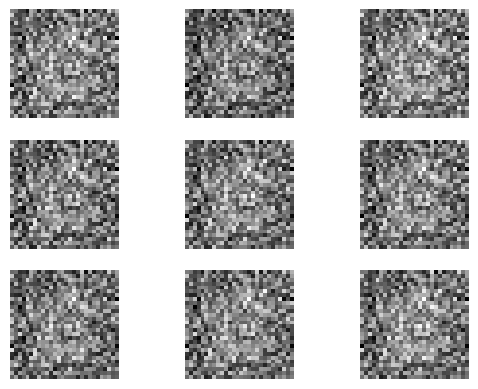

 10%|▉         | 39/400 [01:32<14:28,  2.41s/it]

Start Generating


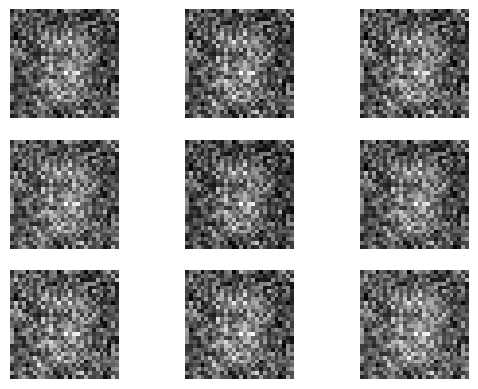

 12%|█▏        | 49/400 [01:56<13:03,  2.23s/it]

Start Generating


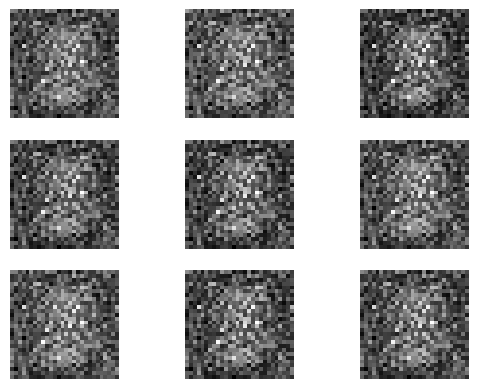

 14%|█▍        | 58/400 [02:18<13:29,  2.37s/it]

In [ ]:
G_hellinger, D_hellinger, G_loss_history_hellinger, D_loss_history_hellinger = train.main(epochs = epochs, lr = 0.0002, batch_size = 2048, mnist_size = mnist_size, f_divergence = 5)
plt.plot(D_loss_history_hellinger, label = "D_loss")
plt.plot(G_loss_history_hellinger, label = "G_loss")
plt.legend()
plt.show()

In [ ]:
save_models(G_hellinger, D_hellinger, "checkpoints", "hellinger")
if (DOWNLOAD):
  files.download('./checkpoints/G_hellinger.pth')
  files.download('./checkpoints/D_hellinger.pth')

### Jensen Shannon Divergence

In [ ]:
G_jensen_shannon, D_jensen_shannon, G_loss_history_jensen_shannon, D_loss_history_jensen_shannon = train.main(epochs = epochs_jensen_shannon, lr = 0.0002, batch_size = 2048, mnist_size = mnist_size, f_divergence = 6)
plt.plot(D_loss_history_jensen_shannon, label = "D_loss")
plt.plot(G_loss_history_jensen_shannon, label = "G_loss")
plt.legend()
plt.show()

In [ ]:
save_models(G_jensen_shannon, D_jensen_shannon, "checkpoints", "jensen_shannon")
if (DOWNLOAD):
  files.download('./checkpoints/G_jensen_shannon.pth')
  files.download('./checkpoints/D_jensen_shannon.pth')

### f_GAN Divergence

In [ ]:
G_f_GAN, D_f_GAN, G_loss_history_f_GAN, D_loss_history_f_GAN = train.main(epochs = epochs, lr = 0.0002, batch_size = 2048, mnist_size = mnist_size, f_divergence = 1)
plt.plot(D_loss_history_f_GAN, label = "D_loss")
plt.plot(G_loss_history_f_GAN, label = "G_loss")
plt.legend()
plt.show()

In [ ]:
save_models(G_f_GAN, D_f_GAN, "checkpoints", "f_GAN")
if (DOWNLOAD):
  files.download('./checkpoints/G_f_GAN.pth')
  files.download('./checkpoints/D_f_GAN.pth')

### BCE as loss function

In [ ]:
G_BCE, D_BCE, G_loss_history_BCE, D_loss_history_BCE = train.main(epochs = epochs, lr = 0.0002, batch_size = 2048, mnist_size = mnist_size, f_divergence = 0)
plt.plot(D_loss_history_BCE, label = "D_loss")
plt.plot(G_loss_history_BCE, label = "G_loss")
plt.legend()
plt.show()

In [ ]:
save_models(G_BCE, D_BCE, "checkpoints", "BCE")
if (DOWNLOAD):
  files.download('./checkpoints/G_BCE.pth')
  files.download('./checkpoints/D_BCE.pth')
utils.save_models(G_BCE, D_BCE, "checkpoints")
# Make sure the BCE model is the last one before %%python3 generate.py --divergence 0

## Generating images

In [ ]:
%%python3 generate.py --divergence 0

GPU is available
GPU is available
Model Loading...
Used model: G.pth
Model loaded.
Start Generating


In [ ]:
%%python3 generate.py --divergence 1

GPU is available
GPU is available
Model Loading...
Used model: G_f_GAN.pth


Traceback (most recent call last):
  File "/content/generate.py", line 44, in <module>
    model = load_model(model, 'checkpoints', args.divergence)
  File "/content/utils.py", line 155, in load_model
    ckpt = torch.load(os.path.join(folder,model))
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 435, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 416, in __init__
    super().__init__(open(name, mode))
FileNotFoundError: [Errno 2] No such file or directory: 'checkpoints/G_f_GAN.pth'


CalledProcessError: ignored

In [ ]:
%%python3 generate.py --divergence 2

GPU is available
GPU is available
Model Loading...
Used model: G_KL.pth
Model loaded.
Start Generating


In [ ]:
%%python3 generate.py --divergence 3

GPU is available
GPU is available
Model Loading...
Used model: G_reverse_KL.pth
Model loaded.
Start Generating


In [ ]:
%%python3 generate.py --divergence 4

GPU is available
GPU is available
Model Loading...
Used model: G_pearson.pth
Model loaded.
Start Generating


In [ ]:
%%python3 generate.py --divergence 5

GPU is available
GPU is available
Model Loading...
Used model: G_hellinger.pth
Model loaded.
Start Generating


In [ ]:
%%python3 generate.py --divergence 6

GPU is available
GPU is available
Model Loading...
Used model: G_jensen_shannon.pth
Model loaded.
Start Generating


## Evaluating

In [ ]:
%%python3 -q metrics.py

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Images saved.


100%|██████████| 4542/4542 [00:00<00:00, 29489982.61it/s]


In [ ]:
%%python3 -m pytorch_fid divergence_samples/samplesKL originals

FID:  441.1846796911805


Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 316MB/s]
100%|██████████| 200/200 [00:37<00:00,  5.28it/s]


In [ ]:
%%python3 -m pytorch_fid divergence_samples/samplesReverseKL originals

FID:  230.19329783361877


100%|██████████| 200/200 [00:39<00:00,  5.02it/s]


In [ ]:
%%python3 -m pytorch_fid divergence_samples/samplesPearson originals

FID:  196.3170570530542


100%|██████████| 200/200 [00:39<00:00,  5.03it/s]


In [ ]:
%%python3 -m pytorch_fid divergence_samples/samplesHellinger originals

FID:  319.48502117772665


100%|██████████| 200/200 [00:39<00:00,  5.03it/s]


In [ ]:
%%python3 -m pytorch_fid divergence_samples/samplesJensen_Shannon originals

FID:  79.20576449664483


100%|██████████| 200/200 [00:39<00:00,  5.03it/s]


In [ ]:
%%python3 -m pytorch_fid samples originals

FID:  49.056578131941734


100%|██████████| 200/200 [00:39<00:00,  5.02it/s]


## Results

### For a small sample size

For the parameters:
epochs = 400
mnist_size = 100
epochs for jensen = 200
We had the following results:

| Divergence         | FID Score |
|--------------------|-----------|
| GAN                | 254       |
| KL                 | 290       |
| Reverse KL         | 364       |
| Pearson X^2        | 403       |
| Squared Hellinger  | 310       |
| Jensen-Shannon     | 259       |

### For a medium sample size:


For the parameters:
epochs = 400
mnist_size = 1000
We had the following results:

| Divergence         | FID Score |
|--------------------|-----------|
| GAN                | 242       |
| KL                 | 261       |
| Reverse KL         | 285       |
| Pearson X^2        | 203       |
| Squared Hellinger  | 257       |
| Jensen-Shannon     | 255       |

### For all the dataset (60000 samples)

For the parameters:
epochs = 400
epochs_jensen = 200
mnist_size = 60000
We had the following results:

| Divergence         | FID Score |
|--------------------|-----------|
| GAN                | 49        |
| KL                 | 441       |
| Reverse KL         | 230       |
| Pearson X^2        | 196       |
| Squared Hellinger  | 319       |
| Jensen-Shannon     | 79        |

## Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def GAN_loss(output): # The minus is because we do a gradient ascending
    return (-torch.log(1.0+torch.exp(-output)))

def GAN_loss_conjugate(output):
    return (torch.log(1.0-torch.exp(-torch.log(1.0+torch.exp(-output)))))

def KL_loss(output):
    return (output)

def KL_loss_conjugate(output):
    return -(torch.exp(output - 1))

def reverse_KL_loss(output):
    return (-torch.exp(-output))

def reverse_KL_loss_conjugate(output):
    return -(-1 - torch.log(torch.exp(-output)))

def pearson_chi_loss(output):
    return (output)

def pearson_chi_loss_conjugate(output):
    return -(0.25 * output**2 + output)

def squared_hellinger_loss(output):
    return (1 - torch.exp(-output))

def squared_hellinger_loss_conjugate(output):
    return -((1 - torch.exp(-output))/(1 - (1 - torch.exp(-output))))

def jensen_shannon(output):
    return (torch.log(torch.tensor(2.))-torch.log(1.0+torch.exp(-output)))

def jensen_shannon_conjugate(output):
    return -(-torch.log(2 - torch.exp(torch.log(torch.tensor(2.))-torch.log(1.0+torch.exp(-output)))))

outputs = torch.linspace(-6, 6, 100)
# Calculate losses for each output
non_conjugate_losses = {
    'GAN': GAN_loss(outputs),
    'KL Loss': KL_loss(outputs),
    'Reverse KL Loss': reverse_KL_loss(outputs),
    'Pearson Chi Loss': pearson_chi_loss(outputs),
    'Squared Hellinger Loss': squared_hellinger_loss(outputs),
    'Jensen-Shannon Loss': jensen_shannon(outputs)
}

conjugate_losses = {
    'GAN Conjugate': GAN_loss_conjugate(outputs),
    'KL Loss Conjugate': KL_loss_conjugate(outputs),
    'Reverse KL Loss Conjugate': reverse_KL_loss_conjugate(outputs),
    'Pearson Chi Loss Conjugate': pearson_chi_loss_conjugate(outputs),
    'Squared Hellinger Loss Conjugate': squared_hellinger_loss_conjugate(outputs),
    'Jensen-Shannon Loss Conjugate': jensen_shannon_conjugate(outputs)
}

# Plot non-conjugate loss functions against the output
plt.figure(figsize=(10, 5))
for loss_name, loss_values in non_conjugate_losses.items():
    plt.plot(outputs.numpy(), loss_values.numpy(), label=loss_name)

plt.xlabel('Output')
plt.ylabel('Loss Value')
plt.legend()
plt.title('Non-Conjugate Loss Functions vs. Output')
plt.grid(True)

# Set limits for x-axis and y-axis
plt.xlim(-6, 6)
plt.ylim(-10, 10)
plt.show()

# Plot conjugate loss functions against the output
plt.figure(figsize=(10, 5))
for loss_name, loss_values in conjugate_losses.items():
    plt.plot(outputs.numpy(), loss_values.numpy(), label=loss_name)

plt.xlabel('Output')
plt.ylabel('Loss Value')
plt.legend()
plt.title('Conjugate Loss Functions vs. Output')
plt.grid(True)
plt.xlim(-6, 6)
plt.ylim(-10, 10)
plt.show()
plt.show()

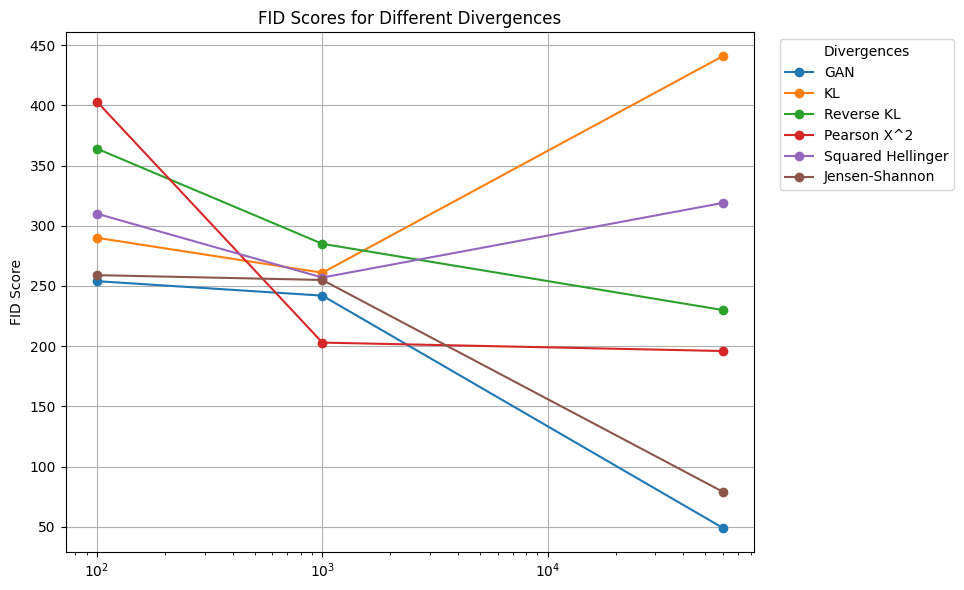

In [ ]:
import matplotlib.pyplot as plt

divergences = ['GAN', 'KL', 'Reverse KL', 'Pearson X^2', 'Squared Hellinger', 'Jensen-Shannon']
fid_scores_mnist_100 = [254, 290, 364, 403, 310, 259]
fid_scores_mnist_1000 = [242, 261, 285, 203, 257, 255]
fid_scores_mnist = [49, 441, 230, 196, 319, 79]

plt.figure(figsize=(10, 6))

# Plotting FID scores for each divergence and sample size
for i, divergence in enumerate(divergences):
    plt.plot([100, 1000, 60000], [fid_scores_mnist_100[i], fid_scores_mnist_1000[i], fid_scores_mnist[i]], label=divergence, marker='o')

#plt.xticks([1, 2, 3], ['100 samples', '1000 samples', '60000 samples'])
plt.ylabel('FID Score')
plt.xscale('log')
plt.title('FID Scores for Different Divergences')
plt.legend(title='Divergences', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.tight_layout()

plt.show()
